# Chapter 2 - Exercise Solutions

## Conceptual

(1) For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

*My note: underfitting leads to more bias; overfitting leads to more variance (changes in fit between samples).*

- (a) The sample size *n* is extremely large, and the number of predictors *p* is small.

**Flexible** methods should perform better: we are unlikely to overfit the data if the sample size is large; with a small number of parameters, the method does not need to be complex.

- (b) The number of predictors *p* is extremely large, and the number of observations *n* is small.

**Inflexible** methods should perform better: with a smalls sample size, overfitting the data is likely.

- (c) The relationship between the predictors and response is highly non-linear.

**Flexible** methods should perform better: non-linear relationshps require additional degrees of freedom.

- (d) The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.

**Inflexible** methodds should perform better: if the variance of $\epsilon$ is high, a flexible model is more likely to overfit the noisy data.

(2) Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide *n* and *p*.

*My note: regression for numerical outcomes; classification for categorical outcomes.*

- (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**Regression**: the outcome, salary, is quantitative. __*n* = 500, *p* = 3__.

- (b) We are considering launching a new product and wish to know whether it will be a *success* or a *failure*. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**Clalssification**: *success* or *failure* is a binary, or categorical outcome. __*n* = 20, *p* = 13__.

- (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.

**Regression**: all inputs and outputs are continuous, quantitative measures. __*n* = 52, *p* = 3__.

(3) We now revisit the bias-variance decomposition.

- (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.

- (b) Explain why each of the five curves has the shape displayed in part (a).

    - Bias: The curve is downward sloping, as the degree of flexibility increases, the curve is better fit to the data (for any particular sample).

    - Variance: The curve is upward sloping, as the degree of flexibility increases, the curve ultimately overfits the data, and therefore follows $var(\epsilon)$ more closely. *In the limit of a model with no flexibility the variance will be zero, since the model fit will be independent of the data.*

    - Training error: The MSE on the training data will always decrease with additional flexibility (# of paramerters), as the bias and variance *for the specific training sample* both reduce.

    - Test error: The MSE on the test data will be the sum of the bias, variance, and Bayes error. Bias will dominate in inflexible models; variance will dominate in flexible models.

    - Bayes error: The Bayes error is the "true error" in the model, and does not change according to degree of flexibility of the model.



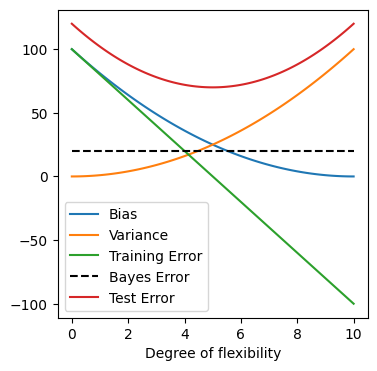

In [1]:
import numpy as np
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

x = np.arange(0,10.1,0.1)
bias = (x-10)**2
var = x**2
trainingEr = -20*x + 100
bayesEr = 20 + np.zeros_like(x)
testEr = bias + var + bayesEr

fig, ax = subplots(figsize=(4, 4))
ax.plot(x, bias, label="Bias")
ax.plot(x, var, label="Variance")
ax.plot(x, trainingEr, label="Training Error");
ax.plot(x, bayesEr, color = 'black', linestyle = '--', label="Bayes Error")
ax.plot(x, testEr, label="Test Error")
ax.set_xlabel("Degree of flexibility")
plt.legend();

(4) You will now think of some real-life applications for statistical learning.

- (a) Describe three real-life applications in which *classification* might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

Identifying bicycles from the video feed of a self driving car. The predictors would be video/images from the camera, the response would be yes/no. The goal would be prediction.

- (b) Describe three real-life applications in which *regression* might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

Understanding the relationship between wages and other factors. The predictors could be education, age, neighborhood, etc., and the response would be the wage level. The goal would be inference.

- (c) Describe three real-life applications in which *cluster analysis* might be useful.

Sorting users by politicla beliefs, or any other kind of classfication.

(5) What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

**Advantages of flexible vs. inflexible:**

- Lower bias

- Better prediction

- Better accomodation for non-linear relationships in the data.

- *Preferred when:* sample is large, prediction is the goal (vs. inference), non-liner relationships in the data; small set of predictors

**Disadvantages of flexible vs. inflexible.**

- Higher variance across samples

- Inference is more difficult; with so many parameters, understanding how each influences the outcome is not as clear

- *Preferred when:* sample is small, inference is the goal (vs. prediction), linear relationships in the data; large set of predictors


(6) Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

**Parametric:** the functional form of the modle is specified; less flexible; simplier, with fewer parameters.

*Advantages*: Easier to interpret results for inference. Less computationally intensive. Less risk of overfitting, less variance of estimator. Same considerations of **less-flexible** models.

**Non-parametric:** the functional form of the model is not specified; more flexible; more parameters. Same considerations of **more-flexible** models.

*Advantages*: More flexible models, better for prediction. Likely a better fit to the data (less bias.)

(7) The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

| Obs. | X1  | X2 | X3 | Y     |
|------|-----|----|----|-------|
| 1    | 0   | 3  | 0  | Red   |
| 2    | 2   | 0  | 0  | Red   |
| 3    | 0   | 1  | 3  | Red   |
| 4    | 0   | 1  | 2  | Green |
| 5    | −1  | 0  | 1  | Green |
| 6    | 1   | 1  | 1  | Red   |

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

- (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

1: sqrt( 0^2 + 3^9 + 0^2 ) = 3
2: sqrt( 2^2 + 0^2 + 0^2 ) = 2
3: sqrt( 0^2 + 1^2 + 3^2 ) = sqrt(10) = 3.16
4: sqrt( 0^2 + 1^2 + 2^2 ) = sqrt(5) = 2.24
5: sqrt( -1^2 + 0^2 + 1^2 ) = sqrt(2) = 1.41
6: sqrt( 1^2 + 1^2 + 1^2 ) = sqrt(3) = 1.73

- (b) What is our prediction with K = 1? Why?

The nearest neighbor is observation 5, with a distance of 1.41. So the prediction for Y is Green, taken directly from obs. 5.

- (c) What is our prediction with K = 3? Why?

The three nearest neighbors are observations:
5 (1.41) = Green
6 (1.73) = Red
2 (2) = Red

We "average" the three resulting colors, i.e. take the most common one, which is Red, and this is assigned to Y.

- (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

To approximate a non-linear boundary, we need to use a more flexible estimation method (model), which means using a smaller value for K. A large value of K will oversimplify the result and not capure the nuances of the non-linear boundary.



## Applied

### (8)

In [2]:
import pandas as pd

**(a)** Use the pd.read_csv() function to read the data into Python. Call the loaded data college.
Make sure that you have the directory set to the correct location for the data

In [3]:
college = pd.read_csv("college.csv")
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**(b)** Look at the data used in the notebook by creating and running a new cell with just the code `college` in it.
You should notice that the first column is just the name of each university in a column named something like `Unnamed: 0`.
We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the
following commands and similarly look at the resulting data frames:

In [4]:
college2 = pd.read_csv('College.csv', index_col=0)

college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)

college3 = college3.set_index('College')

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with the following:

In [5]:
college = college3
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**(c)** Use the `describe()` method of to produce a numerical summary of the variables in the data set.

In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**(d)** Use the `pd.plotting.scatter_matrix()` function to produce a scatter plot matrix of the first columns `[Top10perc, Apps, Enroll]`. Recall that you can reference a list C of columns of a data frame
`A` using` A[C]`.

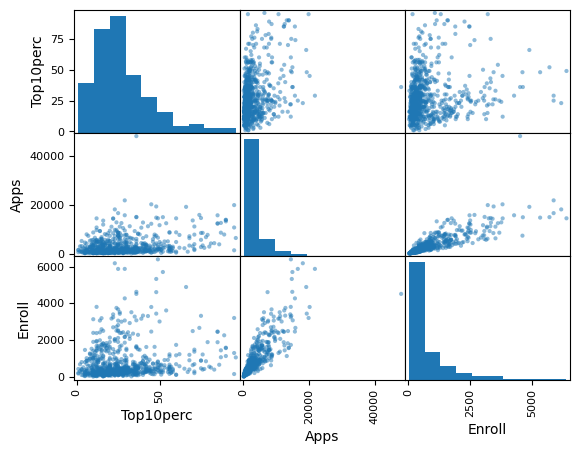

In [7]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

**(e)** Use the `boxplot()` method of `college` to produce side-by-side boxplots of `Outstate` versus `Private`.

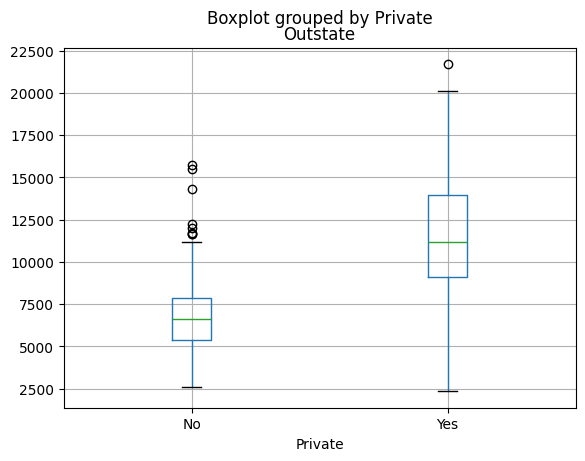

In [8]:
college.boxplot('Outstate', 'Private'); # Grouping variable must come second

**(f)** Create a new qualitative variable, called `Elite`, by binning the `Top10perc` variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%.

In [9]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of `Outstate` versus `Elite`.

In [10]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

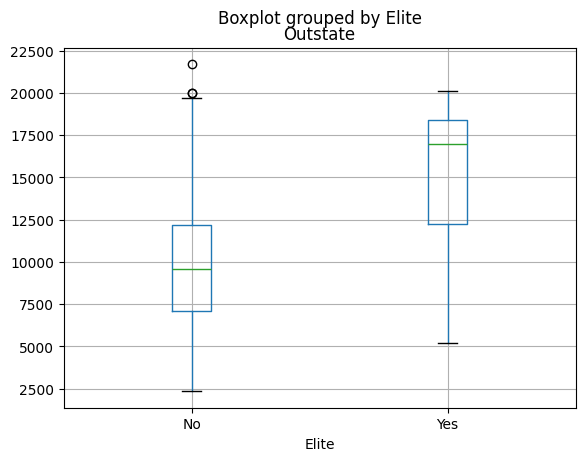

In [11]:
college.boxplot('Outstate', 'Elite');

**(g)** Use the `plot.hist()` method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

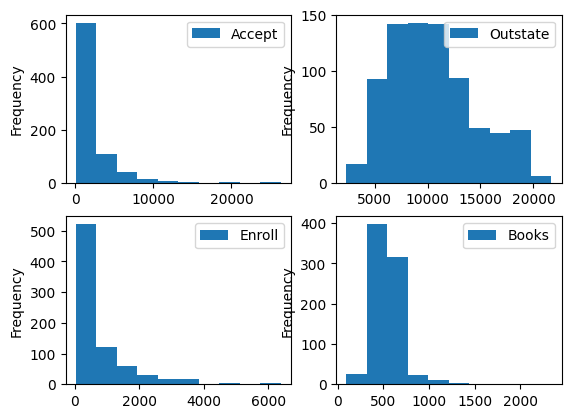

In [21]:
fig, ax = plt.subplots(2,2)
college[['Accept']].plot.hist(bins=10, ax=ax[0,0])
college[['Outstate']].plot.hist(bins=10, ax=ax[0,1])
college[['Enroll']].plot.hist(bins=10, ax=ax[1,0])
college[['Books']].plot.hist(bins=10, ax=ax[1,1]);


**(h)** Continue exploring the data, and provide a brief summary of what you discover.

### (9)

In [23]:
from ISLP import load_data
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**(a)** Which of the predictors are quantitative, and which are qualitative?

*Quantitative:* mpg, cylinders, displacement, horsepower, weight, acceleration, year

*Qualitative:* origin, name

**(b)** What is the range of each quantitative predictor? You can answer this using the `min()` and `max()` methods in numpy.

In [41]:
auto_subset = auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year']]

# Range is max - min
auto_subset.max() - auto_subset.min()

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

**(c)** What is the mean and standard deviation of each quantitative predictor?

In [45]:
auto_subset.mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
dtype: float64

In [46]:
auto_subset.std()

mpg               7.805007
cylinders         1.705783
displacement    104.644004
horsepower       38.491160
weight          849.402560
acceleration      2.758864
year              3.683737
dtype: float64

**(d)** Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [55]:
mask = ~auto.index.isin(range(10, 86))
auto_subset_filter = auto_subset.iloc[mask]

# New range
auto_subset_filter.max() - auto_subset_filter.min()


mpg               35.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
dtype: float64

In [57]:
# New mean
auto_subset_filter.mean()

mpg               24.407595
cylinders          5.373418
displacement     187.512658
horsepower       100.848101
weight          2936.534810
acceleration      15.717405
year              77.136076
dtype: float64

In [56]:
# New std
auto_subset_filter.std()

mpg               7.863285
cylinders         1.654179
displacement    100.114616
horsepower       35.954147
weight          811.874450
acceleration      2.713876
year              3.123464
dtype: float64

**(e)** Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(auto['mpg'], auto['displacement'])
ax.set_title('MPG vs. Displacement')
ax.set_xlabel('MPG')
ax.set_ylabel('Displacement');

auto[ (auto['displacement'] >240) & (auto['mpg'] > 35)]


In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(auto['horsepower'], auto['mpg'])
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG');

auto[ (auto['horsepower'] >125) & (auto['mpg'] > 30)]


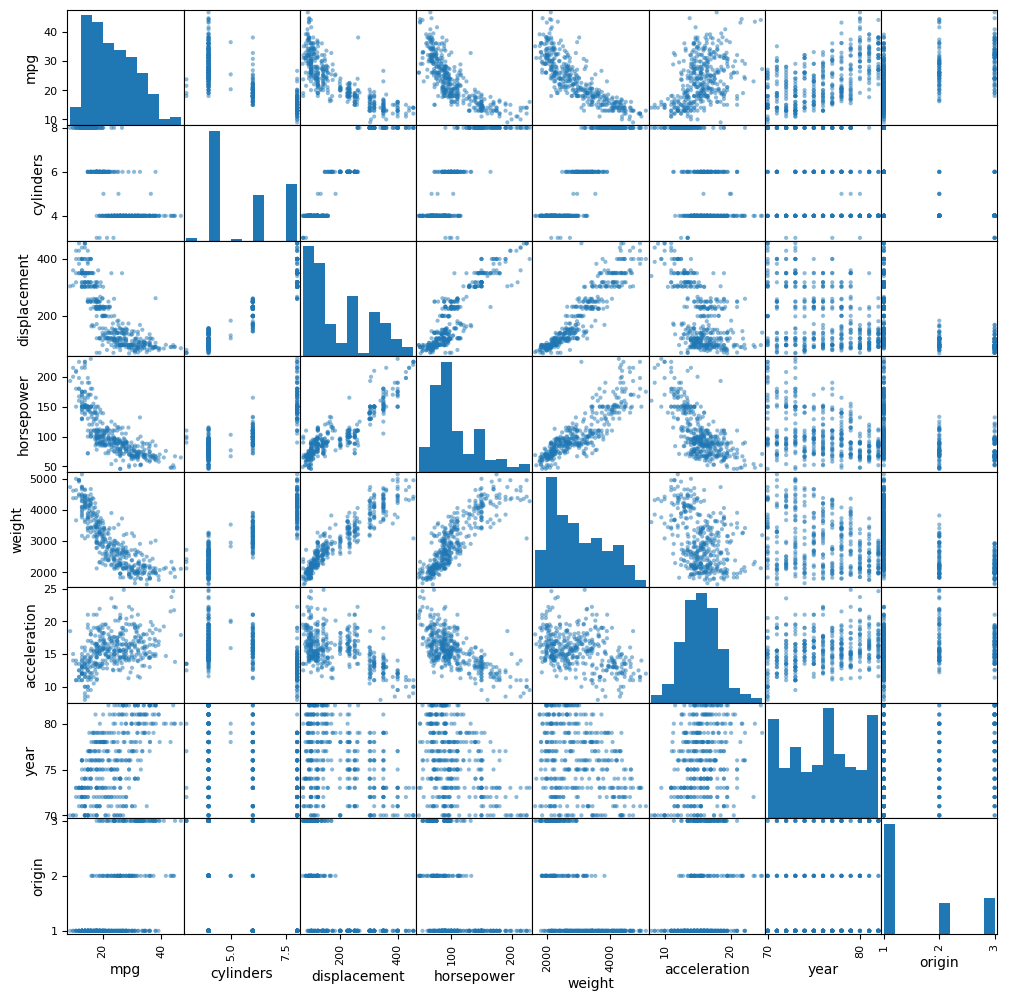

In [101]:
ax = pd.plotting.scatter_matrix(auto, figsize=(12, 12));

**(f)** Suppose that we wish to predict gas mileage (`mpg`) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting `mpg`? Justify your answer.

Text(0.5, 0, 'Year')

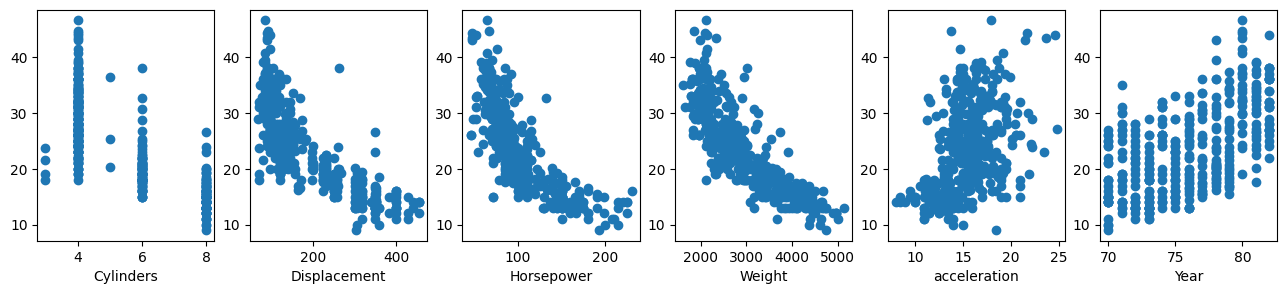

In [117]:
fig, ax = subplots(1, 6, figsize=(16, 3))
ax[0].scatter(auto['cylinders'], auto['mpg'])
ax[0].set_xlabel('Cylinders')

ax[1].scatter(auto['displacement'], auto['mpg'])
ax[1].set_xlabel('Displacement')

ax[2].scatter(auto['horsepower'], auto['mpg'])
ax[2].set_xlabel('Horsepower')

ax[3].scatter(auto['weight'], auto['mpg'])
ax[3].set_xlabel('Weight')

ax[4].scatter(auto['acceleration'], auto['mpg'])
ax[4].set_xlabel('acceleration')

ax[5].scatter(auto['year'], auto['mpg'])
ax[5].set_xlabel('Year')

The above variables make for strong predictors -- the visual correlations are apparent.

### (10)

**(a)** To begin, load in the `Boston` data set, which is part of the `ISLP` library.

In [119]:
from ISLP import load_data
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**(b)** How many rows are in this data set? How many columns? What do the rows and columns represent?

506 rows, 13 columns. Rows are observations (regions of Boston?); Columns are variables (city characteristics).

In [136]:
print("Rows: ", boston.shape[0])
print("Columns: ", boston.shape[1])

boston.index.shape[0]
boston.columns.shape[0]

Rows:  506
Columns:  13


13

**(c)** Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

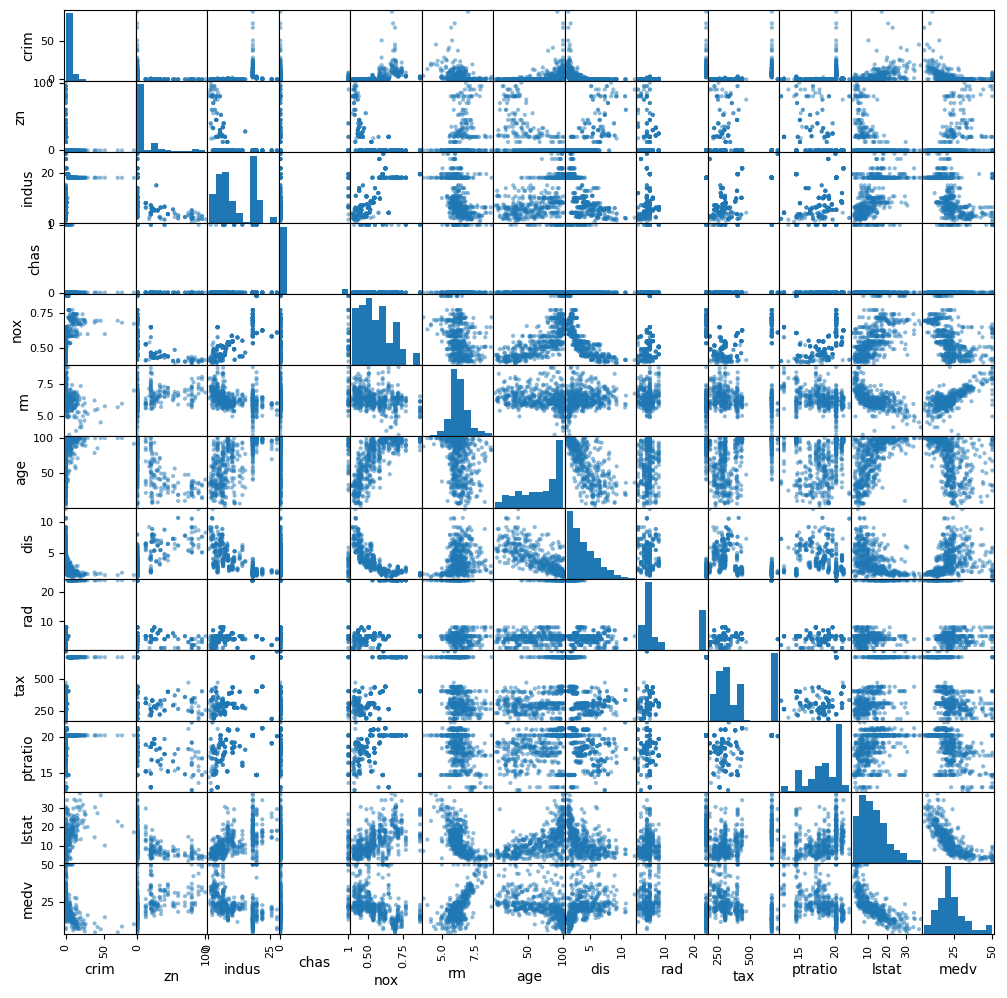

In [139]:
ax = pd.plotting.scatter_matrix(boston, figsize=(12, 12));

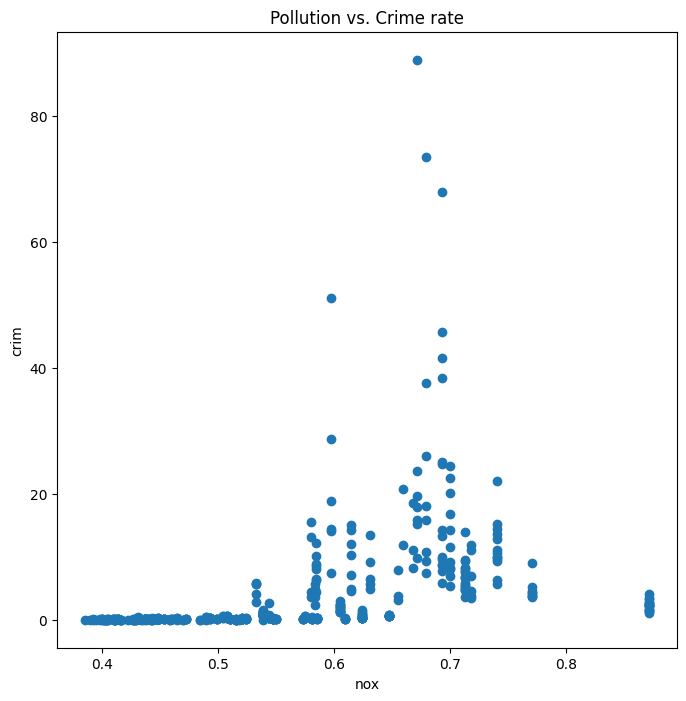

In [151]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(boston['nox'], boston['crim'])
ax.set_xlabel('nox')
ax.set_ylabel('crim')
ax.set_title('Pollution vs. Crime rate');


**(d)** Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

nox, age, lstat are positively associated with crime rate.

medv, dis are negatively associated with crime rate (slighlyl).

**(e)** Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4


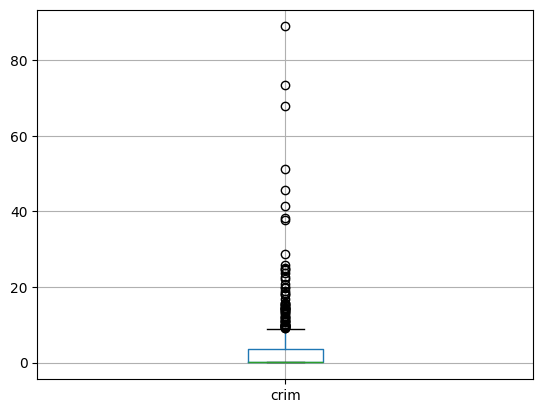

In [165]:
boston[['crim']].boxplot();
# boston[['crim']].hist()

boston[['crim']].describe()

# Crime extreme outlier
boston[ boston['crim'] >  80 ]

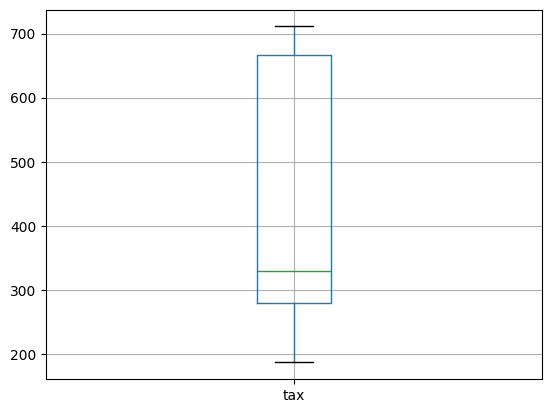

In [169]:
boston[['tax']].boxplot();
# boston[['tax']].hist();

# Tax rate distributed bimodal

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,14.80,18.9
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,17.19,16.2
128,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437,21.2,15.39,18.0
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,18.34,14.3
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,12.60,19.2
131,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,12.26,19.6
132,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437,21.2,11.12,23.0
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,15.03,18.4
134,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,17.31,15.6
135,0.55778,0.0,21.89,0,0.624,6.335,98.2,2.1107,4,437,21.2,16.96,18.1


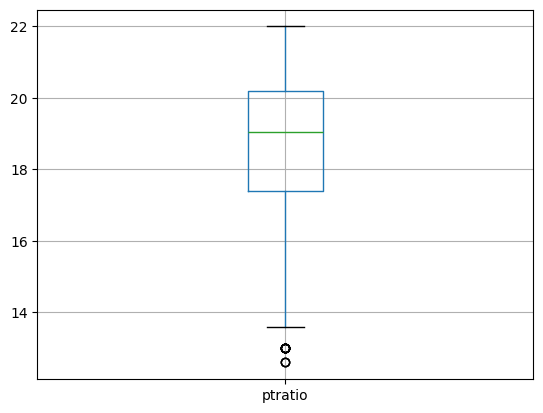

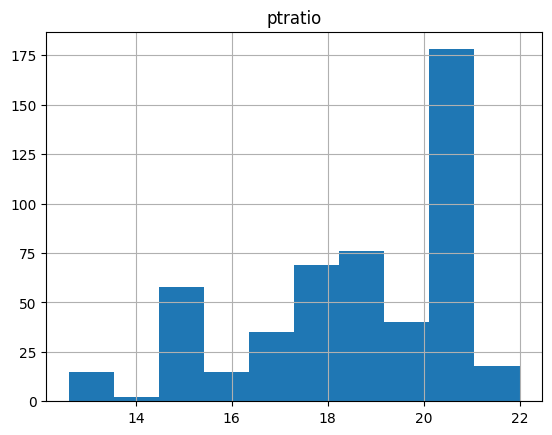

In [174]:
boston[['ptratio']].boxplot();
# boston[['ptratio']].hist();

# Pupil-teacher extreme outliers
boston[ boston['ptratio'] >  21 ]

In [179]:
# Range

boston[['crim', 'tax', 'ptratio']].max() - boston[['crim', 'tax', 'ptratio']].min()

crim        88.96988
tax        524.00000
ptratio      9.40000
dtype: float64

**(f)** How many of the suburbs in this data set bound the Charles river?

35!

In [187]:
boston['chas'][ lambda x: x == 1 ].shape

(35,)

**(g)** What is the median pupil-teacher ratio among the towns in this data set?

19.05!

In [189]:
boston['ptratio'].median()


19.05

**(h)** Which suburb of Boston has lowest median value of owner occupied homes?

What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [195]:
# Relevant observations
boston[ boston['medv'] == boston['medv'].min() ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [282]:
boston['medv'].idxmin() ##### RETURNS FIRST OCCURANCE ONLY!!!!!

398

In [213]:
# How these observations compare to the min, median, and max
boston.describe().index
boston.describe().loc[['min', '50%', 'max']]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
min,0.00632,0.0,0.46,0.0,0.385,3.5610,2.9,1.12960,1.0,187.0,12.60,1.73,5.0
50%,0.25651,0.0,9.69,0.0,0.538,6.2085,77.5,3.20745,5.0,330.0,19.05,11.36,21.2
max,88.97620,100.0,27.74,1.0,0.871,8.7800,100.0,12.12650,24.0,711.0,22.00,37.97,50.0


In [284]:
# Observations for which mdev is at a min; save their indices
relIndex = boston[ boston['medv'] == boston['medv'].min() ].index

#boston.shape[0]

398

In [273]:
# How do these observations rank on other indicators, out of 506 observations total?
boston.rank(method='min', pct=False).loc[ relIndex ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,500.0,1.0,318.0,1.0,421.0,39.0,464.0,29.0,375.0,370.0,311.0,495.0,1.0
405,504.0,1.0,318.0,1.0,421.0,69.0,464.0,21.0,375.0,370.0,311.0,455.0,1.0


**(i)** In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.


In [226]:
boston[ boston['rm'] > 7 ].shape[0]

64

In [225]:
boston[ boston['rm'] > 8 ].shape[0]

13

In [276]:
# Observations for which rm > 8; save their indices
relIndexRm = boston[ boston['rm'] > 8 ].index
relIndexRm

Int64Index([97, 163, 204, 224, 225, 226, 232, 233, 253, 257, 262, 267, 364], dtype='int64')

In [281]:
boston.rank(pct=True) # ranks of all variables

boston.rank(pct=True).loc[ relIndexRm ] # focus on rm > 8

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.343874,0.368577,0.096838,0.466403,0.215415,0.980237,0.484190,0.545455,0.064229,0.215415,0.371542,0.075099,0.936759
163,0.693676,0.368577,0.917984,0.966403,0.688735,0.992095,0.746047,0.276680,0.494071,0.639328,0.068182,0.035573,0.985178
204,0.035573,0.995059,0.089921,0.466403,0.088933,0.976285,0.141304,0.748024,0.271739,0.078063,0.068182,0.011858,0.985178
224,0.527668,0.368577,0.340909,0.466403,0.388340,0.986166,0.509881,0.463439,0.716403,0.416008,0.267787,0.071146,0.956522
225,0.588933,0.368577,0.340909,0.466403,0.388340,0.998024,0.558300,0.463439,0.716403,0.416008,0.267787,0.098814,0.985178
226,0.561265,0.368577,0.340909,0.466403,0.388340,0.978261,0.607708,0.502964,0.716403,0.416008,0.267787,0.027668,0.932806
232,0.604743,0.368577,0.340909,0.466403,0.406126,0.990119,0.464427,0.596838,0.716403,0.416008,0.267787,0.007905,0.942688
233,0.539526,0.368577,0.340909,0.466403,0.406126,0.982213,0.439723,0.565217,0.716403,0.416008,0.267787,0.064229,0.964427
253,0.555336,0.819170,0.289526,0.466403,0.133399,0.984190,0.019763,0.979249,0.675889,0.497036,0.517787,0.043478,0.946640
257,0.610672,0.780632,0.170949,0.466403,0.775692,0.996047,0.610672,0.150198,0.494071,0.166996,0.018775,0.132411,0.985178
